# ViperGPT -- Quick Start

This notebook is meant to be a quick entry into ViperGPT. **Warning:** This notebook will execute arbitrary code on your machine. Proceed at your own risk.

Before running this code, modify any parameters at `configs/my_config.yaml`.

In [1]:
from main_simple_lib import *

2025-02-14 15:23:09.849257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 15:23:09.903806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-14 15:23:10.900214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using cache found in /home/disi/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /home/disi/.cache/torch/hub/intel-isl_MiDaS_master


### Recreate step-by-step reasoning using only generated code

Run the following cells to recreate step-by-step reasoning with intermediate model's outputs. 

DO NOT FORGET to insert your code into the custom_code variable!!!

In [2]:
def recreate_code(code):    
    code = ast.unparse(ast.parse(code))
    code_for_syntax = code.replace("(image, my_fig, time_wait_between_lines, syntax)", "(image)")
    syntax = Syntax(code_for_syntax, "python", theme="monokai", line_numbers=True, start_line=0)
    return code, syntax

In [3]:
custom_code = """
import math

def execute_command(image, my_fig=None, time_wait_between_lines=None, syntax=None):
    image_patch = ImagePatch(image)
    chair_patches = image_patch.find(\"wood chair\")
    if not chair_patches:
        return \"No wood chair found in the image.\"
    
    sidewalk_patches = image_patch.find(\"sidewalk\")
    if not sidewalk_patches:
        return \"No sidewalk found in the image.\"

    # Find the chair patch overlapping with the sidewalk
    target_chair = None
    for chair in chair_patches:
        for sidewalk in sidewalk_patches:
            if chair.overlaps_with(sidewalk.left, sidewalk.lower, sidewalk.right, sidewalk.upper):
                target_chair = chair
                break
        if target_chair:
            break

    if not target_chair:
        return \"No wood chair found on the sidewalk.\"

    # Assume chair is sitting unless explicitly stated otherwise.  Improve this with visual analysis later.
    return \"sitting\"
"""

In [4]:
im = load_image("data/GQA/images/gqa-109.jpg")
show_single_image(im)

In [5]:
code = recreate_code(custom_code)

Output()

Using device: cuda

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

image_patch =

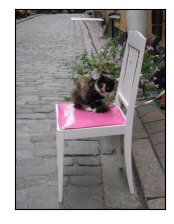

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

chair_patches[0] =

chair_patches[1] =

chair_patches[2] =

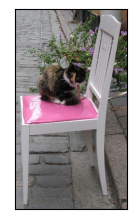

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

not chair_patches = False

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

sidewalk_patches[0] =

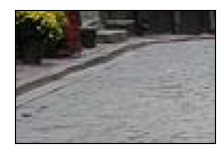

sidewalk_patches[1] =

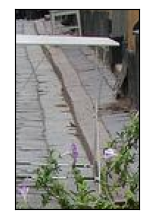

sidewalk_patches[2] =

sidewalk_patches[3] =

sidewalk_patches[4] =

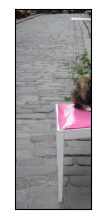

sidewalk_patches[5] =

sidewalk_patches[6] =

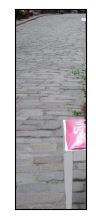

sidewalk_patches[8] =

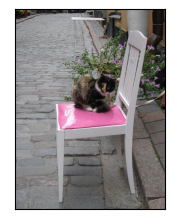

───────────────────────────────────────────────────── Line 8 ──────────────────────────────────────────────────────

not sidewalk_patches = False

───────────────────────────────────────────────────── Line 10 ─────────────────────────────────────────────────────

target_chair = None

───────────────────────────────────────────────────── Line 11 ─────────────────────────────────────────────────────

chair =

───────────────────────────────────────────────────── Line 12 ─────────────────────────────────────────────────────

sidewalk =

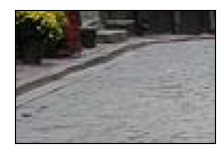

───────────────────────────────────────────────────── Line 13 ─────────────────────────────────────────────────────

chair.overlaps_with(sidewalk.left, sidewalk.lower, sidewalk.right, sidewalk.upper) = False

───────────────────────────────────────────────────── Line 12 ─────────────────────────────────────────────────────

sidewalk =

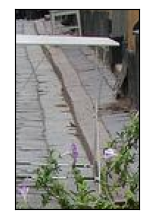

chair.overlaps_with(sidewalk.left, sidewalk.lower, sidewalk.right, sidewalk.upper) = True

───────────────────────────────────────────────────── Line 14 ─────────────────────────────────────────────────────

target_chair =

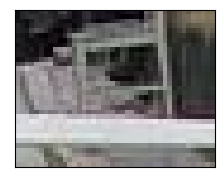

───────────────────────────────────────────────────── Line 16 ─────────────────────────────────────────────────────

target_chair =

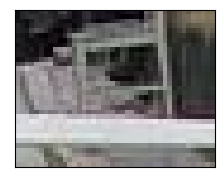

───────────────────────────────────────────────────── Line 18 ─────────────────────────────────────────────────────

not target_chair = False

───────────────────────────────────────────────────── Line 20 ─────────────────────────────────────────────────────

"sitting" = sitting

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = sitting

In [6]:
execute_code(code, im, show_intermediate_steps=True)

#### Object detection: find()

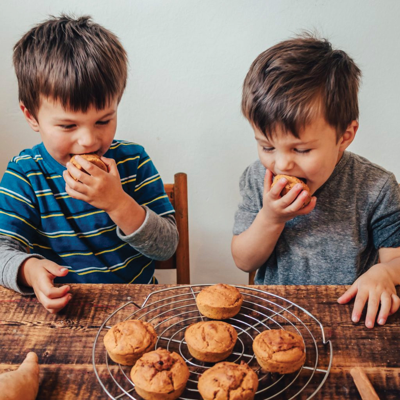

Chosen code generation model is: gemini


   0 import math                                                                                                   
   1                                                                                                               
   2 def execute_command(image):                                                                                   
   3     image_patch = ImagePatch(image)                                                                           
   4     muffin_patches = image_patch.find("muffin")                                                               
   5     kid_patches = image_patch.find("kid")                                                                     
   6                                                                                                               
   7     num_muffins = len(muffin_patches)                                                                         
   8     num_kids = len(kid_patches)                                                                               
   9                                                                                                               
  10     if num_kids == 0:                                                                                         
  11         return "There are no kids in the image."                                                              
  12     elif num_muffins == 0:                                                                                    
  13         return "There are no muffins in the image."                                                           
  14     else:                                                                                                     
  15         muffins_per_kid = num_muffins / num_kids                                                              
  16         return f"Each kid can have {muffins_per_kid:.0f} muffins for it to be fair."                          
  17                                                                                                               

In [7]:
im = load_image('https://viper.cs.columbia.edu/static/images/kids_muffins.jpg')

query = 'How many muffins can each kid have for it to be fair?'

show_single_image(im)
code = get_code(query)

Output()

Using device: cuda

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

image_patch =

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

muffin_patches[0] =

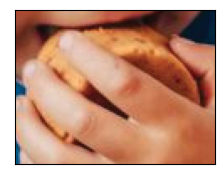

muffin_patches[1] =

muffin_patches[2] =

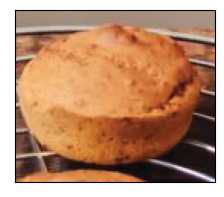

muffin_patches[3] =

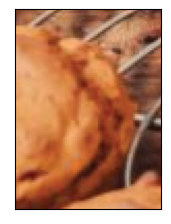

muffin_patches[4] =

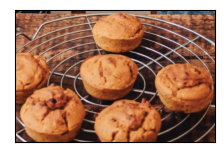

muffin_patches[5] =

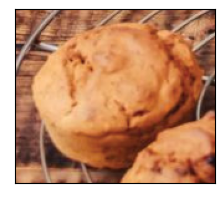

muffin_patches[6] =

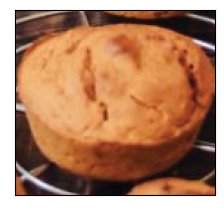

muffin_patches[7] =

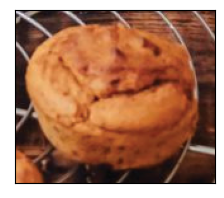

muffin_patches[8] =

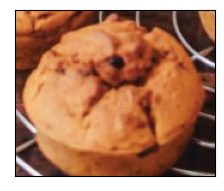

muffin_patches[9] =

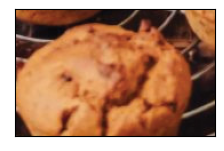

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

kid_patches[0] =

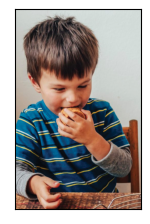

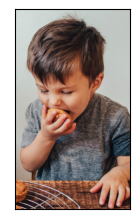

kid_patches[2] =

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

num_muffins = 10

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

num_kids = 3

───────────────────────────────────────────────────── Line 8 ──────────────────────────────────────────────────────

num_kids = 3

0 = 0

───────────────────────────────────────────────────── Line 13 ─────────────────────────────────────────────────────

muffins_per_kid = 3.3333333333333335

───────────────────────────────────────────────────── Line 14 ─────────────────────────────────────────────────────

f'Each kid can have {muffins_per_kid:.0f} muffins for it to be fair.' = Each kid can have 3 muffins for it to be 
fair.

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = Each kid can have 3 muffins for it to be fair.

In [8]:
execute_code(code, im, show_intermediate_steps=True)

#### Object detection: exists()

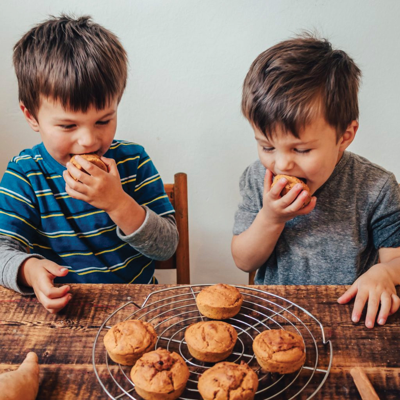

Chosen code generation model is: gemini


  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     return bool_to_yesno(image_patch.exists("kid"))                                                            
  3                                                                                                                

In [9]:
im = load_image('https://viper.cs.columbia.edu/static/images/kids_muffins.jpg')

query = 'Is there a kid in the image?'

show_single_image(im)
code = get_code(query)

Output()

Using device: cuda

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

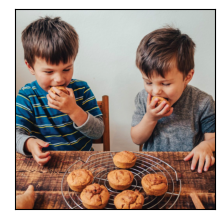

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

bool_to_yesno(image_patch.exists('kid')) = yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = yes

In [10]:
execute_code(code, im, show_intermediate_steps=True)

#### Depth estimation: compute_depth()

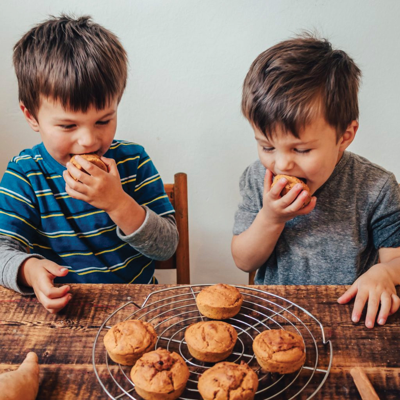

Chosen code generation model is: gemini


   0 import math                                                                                                   
   1 from typing import List, Union                                                                                
   2                                                                                                               
   3 def execute_command(image):                                                                                   
   4     image_patch = ImagePatch(image)                                                                           
   5     muffin_patches = image_patch.find("muffin")                                                               
   6     if not muffin_patches:                                                                                    
   7         return "No muffins found."                                                                            
   8                                                                                                               
   9     # Assuming depth indicates distance from camera.  If depth is not available, use a different metric (e.g.,
  10     muffin_patches.sort(key=lambda x: x.compute_depth())                                                      
  11     return muffin_patches[0]                                                                                  
  12                                                                                                               
  13                                                                                                               

In [11]:
im = load_image('https://viper.cs.columbia.edu/static/images/kids_muffins.jpg')

query = 'Closest muffin to the camera'

show_single_image(im)
code = get_code(query)

Output()

Using device: cuda

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

image_patch =

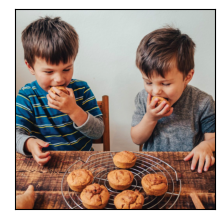

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

muffin_patches[0] =

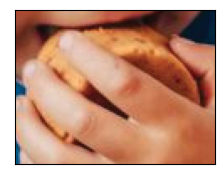

muffin_patches[1] =

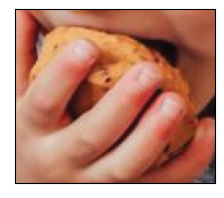

muffin_patches[2] =

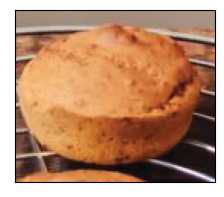

muffin_patches[3] =

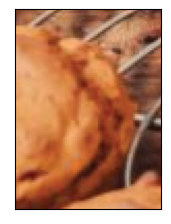

muffin_patches[4] =

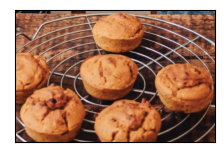

muffin_patches[5] =

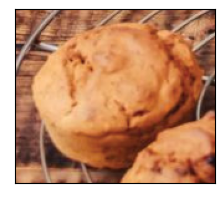

muffin_patches[6] =

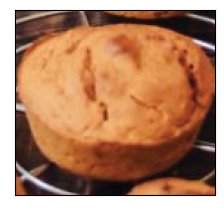

muffin_patches[7] =

muffin_patches[8] =

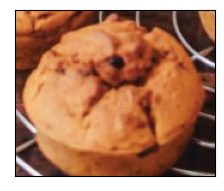

muffin_patches[9] =

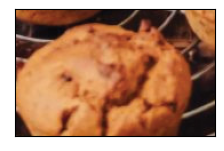

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

not muffin_patches = False

───────────────────────────────────────────────────── Line 8 ──────────────────────────────────────────────────────

muffin_patches[0] =

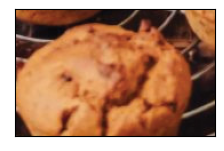

muffin_patches[1] =

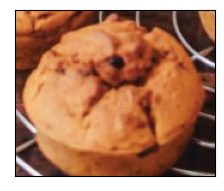

muffin_patches[2] =

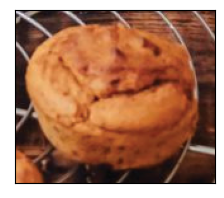

muffin_patches[3] =

muffin_patches[4] =

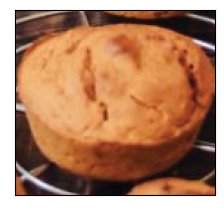

muffin_patches[5] =

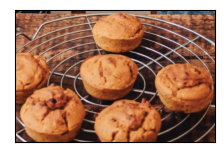

muffin_patches[6] =

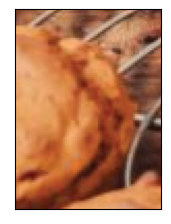

muffin_patches[7] =

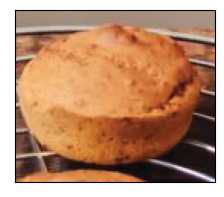

muffin_patches[8] =

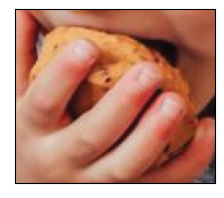

muffin_patches[9] =

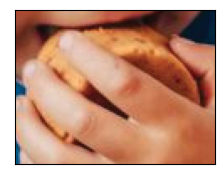

───────────────────────────────────────────────────── Line 9 ──────────────────────────────────────────────────────

muffin_patches[0] =

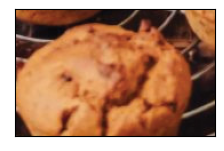

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result =

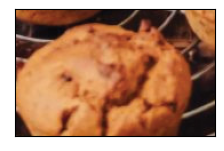

In [12]:
execute_code(code, im, show_intermediate_steps=True)

#### CLIP-style image-text embedding model: verify_property()

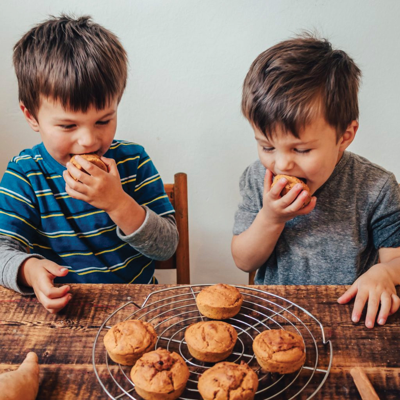

Chosen code generation model is: gemini


   0 def execute_command(image):                                                                                   
   1     image_patch = ImagePatch(image)                                                                           
   2     kids_patches = image_patch.find("kids")                                                                   
   3     if not kids_patches:                                                                                      
   4         return "no"                                                                                           
   5     brown_haired_kids = 0                                                                                     
   6     for kid_patch in kids_patches:                                                                            
   7         if kid_patch.verify_property("hair", "brown"):                                                        
   8             brown_haired_kids += 1                                                                            
   9     return bool_to_yesno(brown_haired_kids > 0)                                                               
  10                                                                                                               
  11                                                                                                               

In [20]:
im = load_image('https://viper.cs.columbia.edu/static/images/kids_muffins.jpg')

query = 'Do the kids have brown hair?'

show_single_image(im)
code = get_code(query)

Output()

Using device: cuda

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

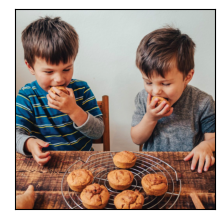

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

kids_patches[0] =

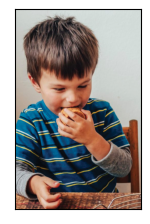

kids_patches[1] =

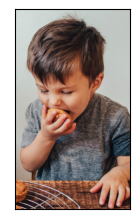

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

not kids_patches = False

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

brown_haired_kids = 0

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

kid_patch =

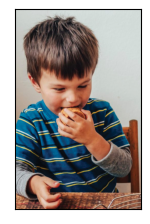

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

kid_patch.verify_property('hair', 'brown') = True

───────────────────────────────────────────────────── Line 8 ──────────────────────────────────────────────────────

brown_haired_kids = 1

───────────────────────────────────────────────────── Line 6 ──────────────────────────────────────────────────────

kid_patch =

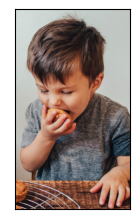

───────────────────────────────────────────────────── Line 7 ──────────────────────────────────────────────────────

kid_patch.verify_property('hair', 'brown') = True

───────────────────────────────────────────────────── Line 8 ──────────────────────────────────────────────────────

brown_haired_kids = 2

───────────────────────────────────────────────────── Line 9 ──────────────────────────────────────────────────────

bool_to_yesno(brown_haired_kids > 0) = yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = yes

In [21]:
execute_code(code, im, show_intermediate_steps=True)